In [ ]:
#setup
import numpy as np
import matplotlib.pyplot as plt
from GrafTo.run import Grafting
import json
import subprocess
import os

# set path for putting files of new system

ROOT = os.getcwd() 
FOLDER = f"{ROOT}/POLY" 

# setting plotting parameters
plt.rcParams.update({"font.size": 12,"text.usetex": False,"mathtext.fontset": "stixsans"}) 

COLORS = {"water,K0":"xkcd:cornflower", "water,K1":"xkcd:algae green", "water,K2":"xkcd:raspberry", "water,K5":"xkcd:amber",
          "vacuum,K0":"xkcd:cornflower", "vacuum,K1":"xkcd:algae green", "vacuum,K2":"xkcd:raspberry", "vacuum,K5":"xkcd:amber",
          "toluene,K0":"xkcd:cornflower", "toluene,K1":"xkcd:algae green", "toluene,K2":"xkcd:raspberry", "toluene,K5":"xkcd:amber"}

MARKERS = {"water":"o", "vacuum":"s"}

In [2]:
#make input file

PDI = { "POLY":1.3}
N = { "POLY":100 }

# If monodisperse, set 'monodisperse' to MOL_SIZE and 'polydisperse' to False
# If polydisperse, set 'polydisperse' to [PDI, N] and set 'monodisperse' to False

GRAFT_DENSITY, SAMPLE_NAME = 1, "POLY"
print(FOLDER)

data = {
    "folder": FOLDER,
    "surface_distance": 0.5,  # distance between chain beads, in nm
    "grafting_density": GRAFT_DENSITY,  # grafting density
    "perturbation":0, # intensity to perturbate atom positions randomly
    "name": SAMPLE_NAME,
    "matrix":
    {
        "file": False,  # path to matrix you wish to graft
        "size": [ 50, 10, 9 ]  # if 'file' is set to False and [lx,ly,lz] is given to 'size', creates a flat slab with lx x ly x lz nm^3 dimensions
    },

    "grafting method":
    {
        "to": False,  # code is ready but not implemented, attaches pre built molecules to the surface
        "from": True  # grows from the surface
    },

    "chain dispersity":
    {
        "monodisperse": False,
        "polydisperse": [ float(PDI[SAMPLE_NAME]) , int(N[SAMPLE_NAME]) ]
    },

    "atom names": {
        "polymer": [ "PDMS","DMS" ],
        "bulk": [ "BULK","N1B" ], 
        "layer":[ "LAY","N1L" ], 
        "under_polymer": [ "PDMS","N1L1" ]
    },

    "surface geometry": 
    {
        "cylindrical": False,
        "flat": True
    }
}

# save options to input file
with open(f'{ROOT}/Grafter/input_grafter.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

# if work folder doesn't exist, make one
subprocess.run(f"mkdir -p {FOLDER};",
               shell=True, executable="/bin/bash")

print("Input file created.")

/Users/frasera/Ricerca/scripts/POLY
Input file created.



name: POLY
folder: /Users/frasera/Ricerca/scripts/POLY
surface distance: 0.5 nm
grafting density: 1 gps/nm^3
matrix: ['build', [50, 10, 9]]
dispersity: ['poly', [1.3, 100]]
surface geometry: flat
atom names: {'polymer': ['PDMS', 'DMS'], 'bulk': ['BULK', 'N1B'], 'layer': ['LAY', 'N1L'], 'under_polymer': ['PDMS', 'N1L1']}
tilt molecule: 0


Creating fcc lattice
Dimensions: 50.11793045701349 10.051313906729069 3.3573532249127416
a:0.7460784944250537, d1:0.5275571627054052, d2:0.2637785813527026, d3:0.45687790485132135

Using Schultz-zimm distribution with args [1.3, 100]
Adding molecules: 100.00%   
Number of molecules: 478  -  Number of spots: 2090  -  Max. grafting dens.: 4.369

Generating itp files


  0%|          | 0/478 [00:00<?, ?it/s]

(<Figure size 1400x400 with 3 Axes>,
 array([<Axes: xlabel='x, $\\AA$', ylabel='z, $\\AA$'>,
        <Axes: xlabel='y, $\\AA$', ylabel='z, $\\AA$'>,
        <Axes: xlabel='x, $\\AA$', ylabel='y, $\\AA$'>], dtype=object))

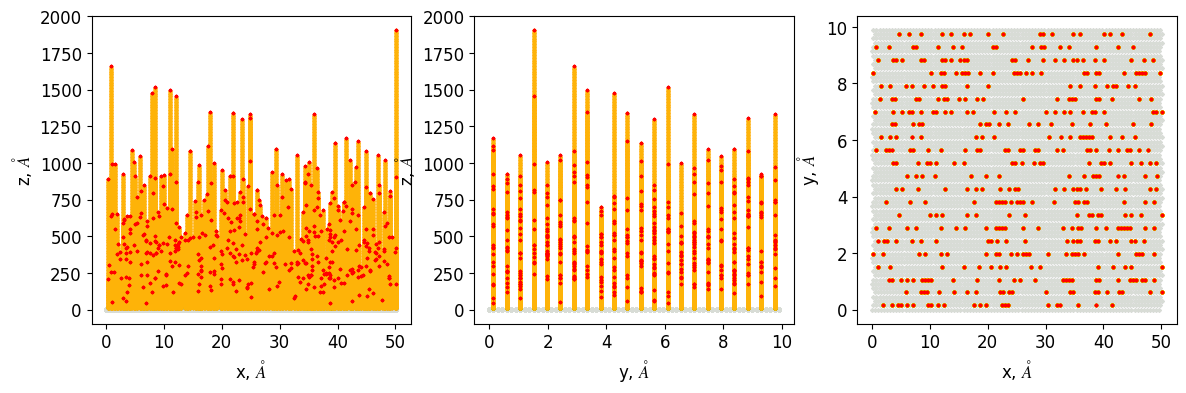

In [3]:
# build system using input file information
NewSystem = Grafting.NewSystem(root=f"{ROOT}")   # instantiate new system class and set the working directory
NewSystem.read_inputs_grafter(f'{ROOT}/Grafter/input_grafter.json')  # read input parameters
NewSystem.build_surface()
NewSystem.graft_matrix()
NewSystem.out_topology()
NewSystem.make_itps_PDMS(NewSystem.molSizes)
NewSystem.plot_system(colors={"N1L":"xkcd:light gray","N1L1":"xkcd:light gray","N1B":"xkcd:light gray","DMS":"xkcd:amber","END":"red"},
                      zorders={"N1L":1,"N1L1":1,"N1B":1,"DMS":2,"END":3})

<Axes: xlabel='N', ylabel='Count'>

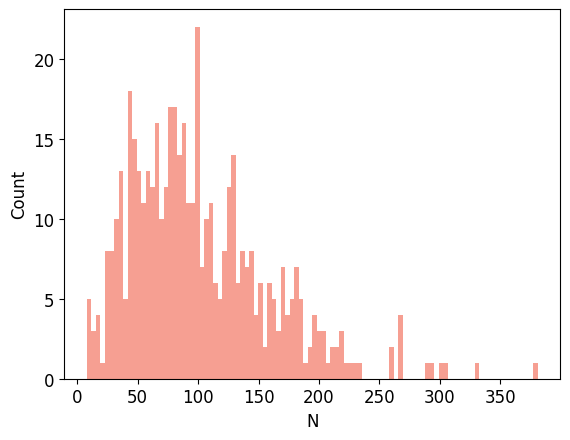

In [4]:
NewSystem.plot_mol_distribution() # plot distribution of chain sizes